In [55]:
import pandas as pd
import numpy as np
import scipy.stats as stats
#pip install pandas openpyxl
import sys
import matplotlib.pylab as plt
import seaborn as sns

from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#!pip install circlify
#import the circlify library
import circlify
#%matplotlib 
from PIL import Image

In [2]:
df = pd.read_excel('/Users/chenjin/Library/CloudStorage/OneDrive-UniversityofPittsburgh/2023Fall/IV/mid/streaming.xlsx',sheet_name='Sheet1', engine='openpyxl')

In [3]:
df['Circle Size'] = df['Percentage of Music Listeners'] * 400

df["r"] = np.sqrt(df["Circle Size"]/3.14)
df['sr'] = df["r"]/3

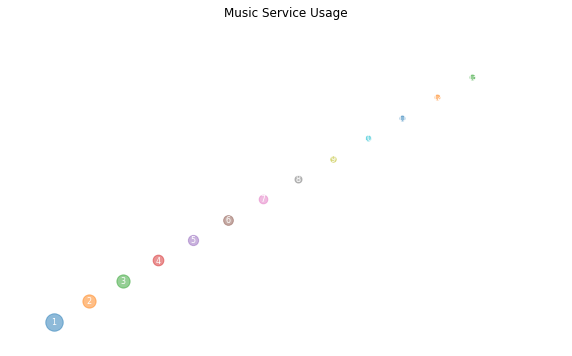

In [4]:


# Sort dataframe by "Percentage of Music Listeners" in descending order
df_sorted = df.sort_values(by='Percentage of Music Listeners', ascending=False)

# Setting the figure size
plt.figure(figsize=(10, 6))

# Generating coordinates in a spread-out fashion
x = np.linspace(0.1, 1, len(df_sorted))
y = np.linspace(0.1, 1, len(df_sorted))

# Ensure all values for circle_area are positive and appropriate for plotting
circle_areas = [val * 100 * 5 for val in df_sorted['Percentage of Music Listeners']]
for i, (area, row) in enumerate(zip(circle_areas, df_sorted.itertuples())):
    plt.scatter(x[i], y[i], s=area, alpha=0.5)
    plt.text(x[i], y[i], row[1], ha='center', va='center', color='white', fontsize=8)

plt.ylim(0, 1.2)
plt.xlim(0, 1.2)
plt.title('Music Service Usage')
plt.axis('off')  # Hide axis
plt.show()




In [5]:
# df['Circle Size'] = df['Percentage of Music Listeners'] * 5
# df_sorted = df.sort_values(by='Circle Size', ascending=False).reset_index(drop=True)
# plt.figure(figsize=(10, 6))


# # Creating a diagonal line for circle centers
# x = np.linspace(0.2, 0.8, len(df_sorted))
# y = np.linspace(0.2, 0.8, len(df_sorted))

# for i, row in df_sorted.iterrows():
#     circle_radius = np.sqrt(row['Circle Size'] / np.pi)  # Area = π * r^2, so r = sqrt(Area/π)
#     plt.gca().add_patch(plt.Circle((x[i], y[i]), circle_radius, color='blue', alpha=0.5))
#     plt.text(x[i], y[i], row['Music Service'], ha='center', va='center')

# plt.xlim(0, 1)
# plt.ylim(0, 1)
# plt.axis('off')
# plt.title('Comet Chart of Music Service Usage')
# plt.show()



In [6]:
df["Music Service"].unique()

array(['YouTube', 'Spotify', 'Amazon Music', 'Pandora', 'SiriusXM',
       'Apple Music', 'iHeartRadio', 'SoundCloud', 'Audacity', 'TuneIn',
       'Deezer', 'Napster', 'Tidal'], dtype=object)

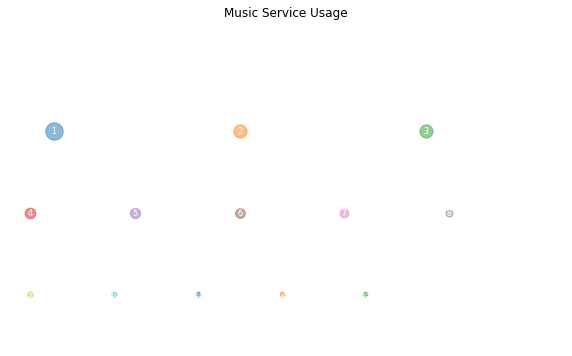

In [7]:
# Sort dataframe by "Percentage of Music Listeners" in descending order
df_sorted = df.sort_values(by='Circle Size', ascending=False)

# Setting the figure size
plt.figure(figsize=(10, 6))

# Counting the number of services
num_services = len(df_sorted)

# Generating x and y coordinates
x = []
y = []

# First three services
x += list(np.linspace(0.1, 0.9, min(3, num_services)))
y += [0.8] * min(3, num_services)

# If more than three services, plot next five
if num_services > 3:
    x += list(np.linspace(0.05, 0.95, min(5, num_services - 3)))
    y += [0.5] * min(5, num_services - 3)

# Remaining services
if num_services > 7:
    remaining_services = num_services - 7
    x += list(np.linspace(0.05, 0.95, remaining_services))
    y += [0.2] * remaining_services

# Ensure all values for circle_area are positive and appropriate for plotting
circle_areas = [val * 100 * 5 for val in df_sorted['Percentage of Music Listeners']]
for i, (area, row) in enumerate(zip(circle_areas, df_sorted.itertuples())):
    plt.scatter(x[i], y[i], s=area, alpha=0.5)
    plt.text(x[i], y[i], row[1], ha='center', va='center', color='white', fontsize=8)  # Accessing using index

plt.ylim(0, 1.2)
plt.xlim(0, 1.2)
plt.title('Music Service Usage')
plt.axis('off')  # Hide axis
plt.show()


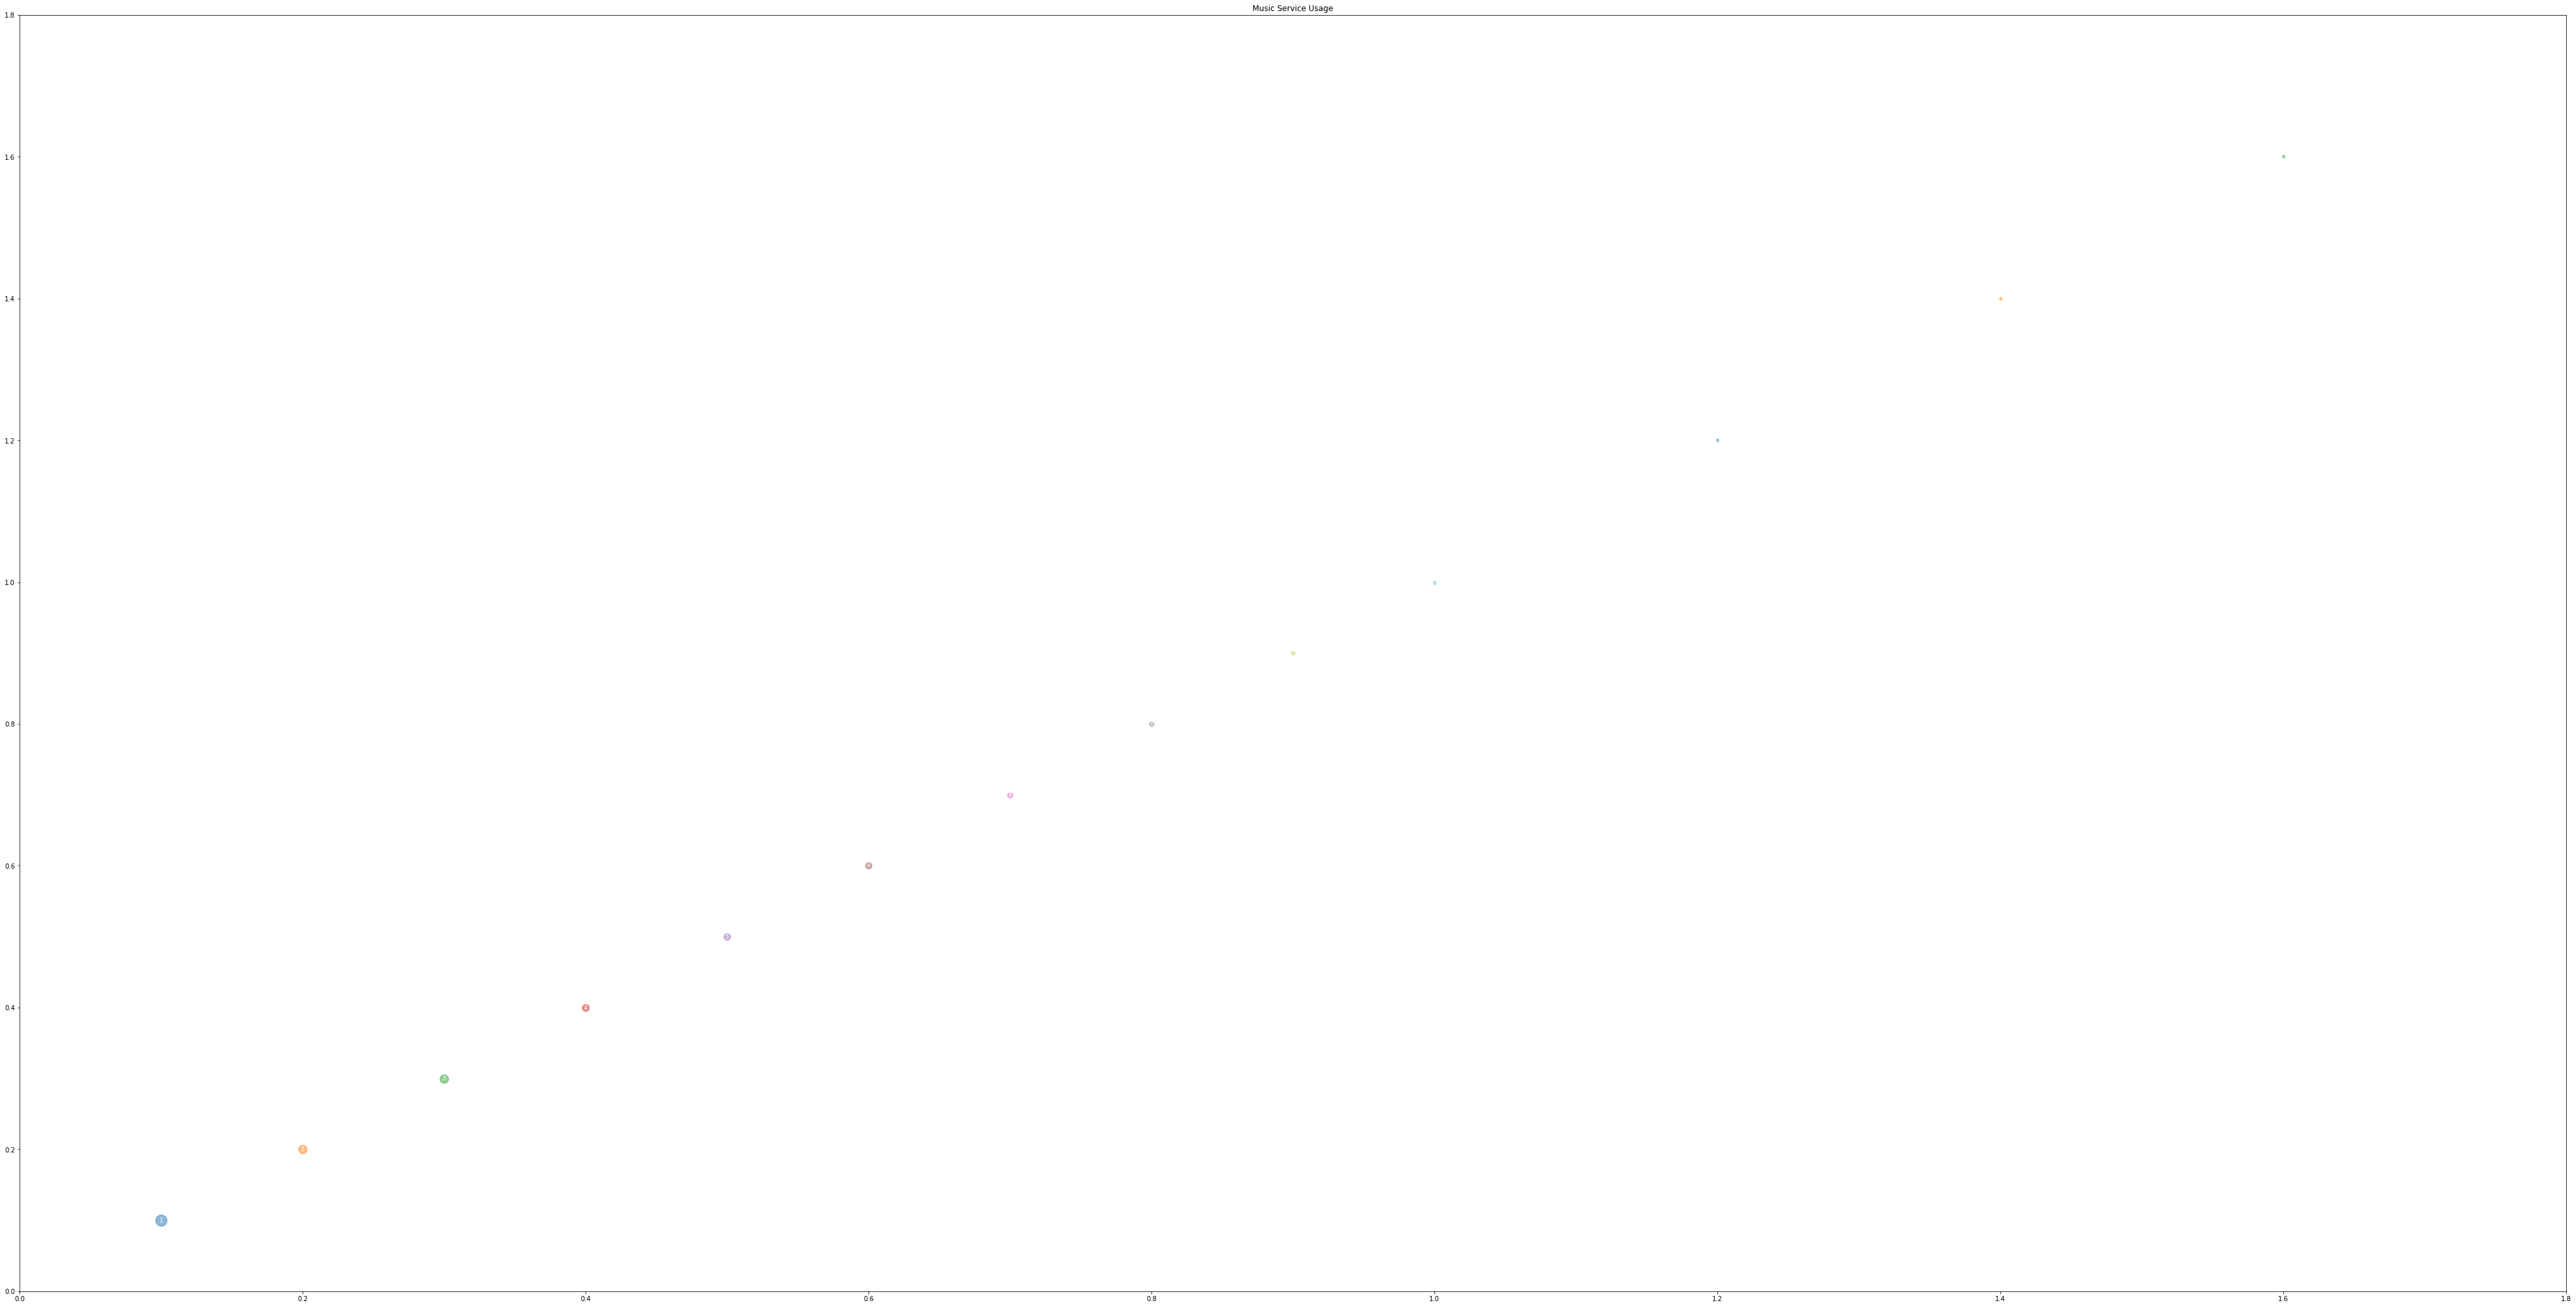

In [8]:
# Sort dataframe by "Percentage of Music Listeners" in descending order
df_sorted = df.sort_values(by='Circle Size', ascending=False)

# Setting the figure size
plt.figure(figsize=(70, 36))

# Counting the number of services
num_services = len(df_sorted)

# Generating x and y coordinates
x = []
y = []

# First service
x += [0.1]
y += [0.1]

# Next three services
x += list(np.linspace(0.2, 0.4, 3))
y += list(np.linspace(0.2, 0.4, 3))

# Next five services
x += list(np.linspace(0.5, 0.9, 5))
y += list(np.linspace(0.5, 0.9, 5))

# Remaining services
if num_services > 9:
    remaining_services = num_services - 9
    x += list(np.linspace(1, 1 + 0.2 * (remaining_services - 1), remaining_services))
    y += list(np.linspace(1, 1 + 0.2 * (remaining_services - 1), remaining_services))

# Ensure all values for circle_area are positive and appropriate for plotting
circle_areas = [val * 100 * 5 for val in df_sorted['Percentage of Music Listeners']]
for i, (area, row) in enumerate(zip(circle_areas, df_sorted.itertuples())):
    plt.scatter(x[i], y[i], s=area, alpha=0.5)
    plt.text(x[i], y[i], row[1], ha='center', va='center', color='white', fontsize=8)

plt.ylim(0, max(y) + 0.2)
plt.xlim(0, max(x) + 0.2)
plt.title('Music Service Usage')
#plt.axis('off')  # Hide axis
plt.show()


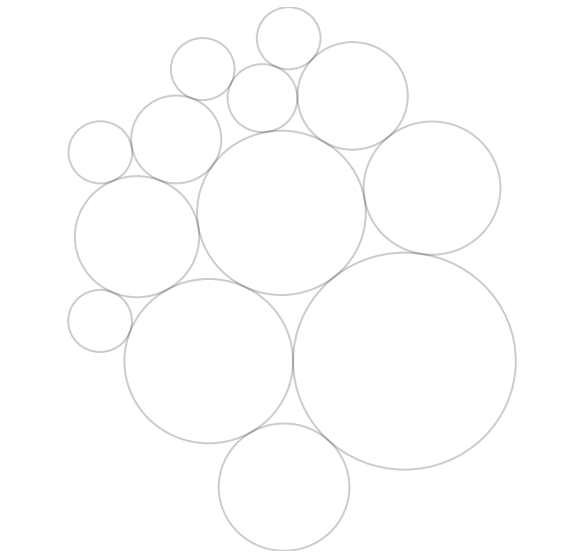

In [9]:
import circlify
import matplotlib.pyplot as plt

# compute circle positions:
circles = circlify.circlify(
    df['Circle Size'].tolist(), 
    show_enclosure=False, 
    target_enclosure=circlify.Circle(x=0, y=0, r=1)
)

# Create just a figure and only one subplot
fig, ax = plt.subplots(figsize=(10,10))

# Remove axes
ax.axis('off')

# Find axis boundaries
lim = max(
    max(
        abs(circle.x) + circle.r,
        abs(circle.y) + circle.r,
    )
    for circle in circles
)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

# print circles
for circle in circles:
    x, y, r = circle
    ax.add_patch(plt.Circle((x, y), r, alpha=0.2, linewidth=2, fill=False))

plt.show()


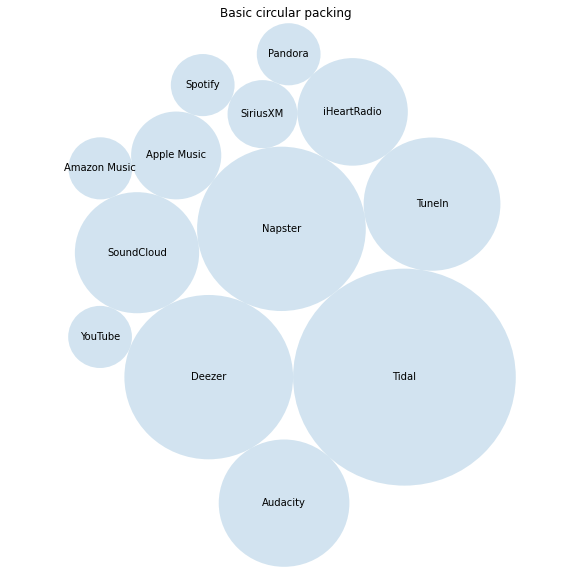

In [10]:
import circlify
import matplotlib.pyplot as plt


# compute circle positions:
circles = circlify.circlify(
    df['Circle Size'].tolist(), 
    show_enclosure=False, 
    target_enclosure=circlify.Circle(x=0, y=0, r=1)
)

# Create just a figure and only one subplot
fig, ax = plt.subplots(figsize=(10,10))

# Title
ax.set_title('Basic circular packing')

# Remove axes
ax.axis('off')

# Find axis boundaries
lim = max(
    max(
        abs(circle.x) + circle.r,
        abs(circle.y) + circle.r,
    )
    for circle in circles
)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

# list of labels
labels = df['Music Service']

# print circles
for circle, label in zip(circles, labels):
    x, y, r = circle
    ax.add_patch(plt.Circle((x, y), r, alpha=0.2, linewidth=2))
    plt.annotate(
          label, 
          (x,y ) ,
          va='center',
          ha='center'
     )


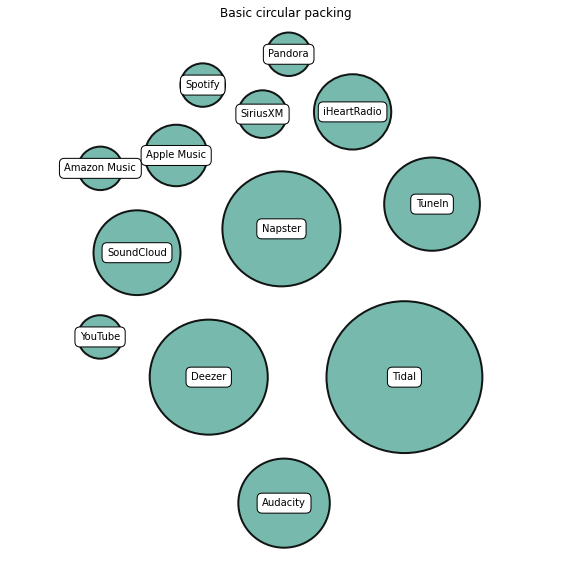

In [11]:

import circlify
import matplotlib.pyplot as plt

# compute circle positions:
circles = circlify.circlify(
    df['Circle Size'].tolist(), 
    show_enclosure=False, 
    target_enclosure=circlify.Circle(x=0, y=0, r=1)
)

# Create just a figure and only one subplot
fig, ax = plt.subplots(figsize=(10,10))

# Title
ax.set_title('Basic circular packing')

# Remove axes
ax.axis('off')

# Find axis boundaries
lim = max(
    max(
        abs(circle.x) + circle.r,
        abs(circle.y) + circle.r,
    )
    for circle in circles
)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

# list of labels
labels = df['Music Service']

# print circles
for circle, label in zip(circles, labels):
    x, y, r = circle
    ax.add_patch(plt.Circle((x, y), r*0.7, alpha=0.9, linewidth=2, facecolor="#69b2a3", edgecolor="black"))
    plt.annotate(label, (x,y ) ,va='center', ha='center', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round', pad=.5))

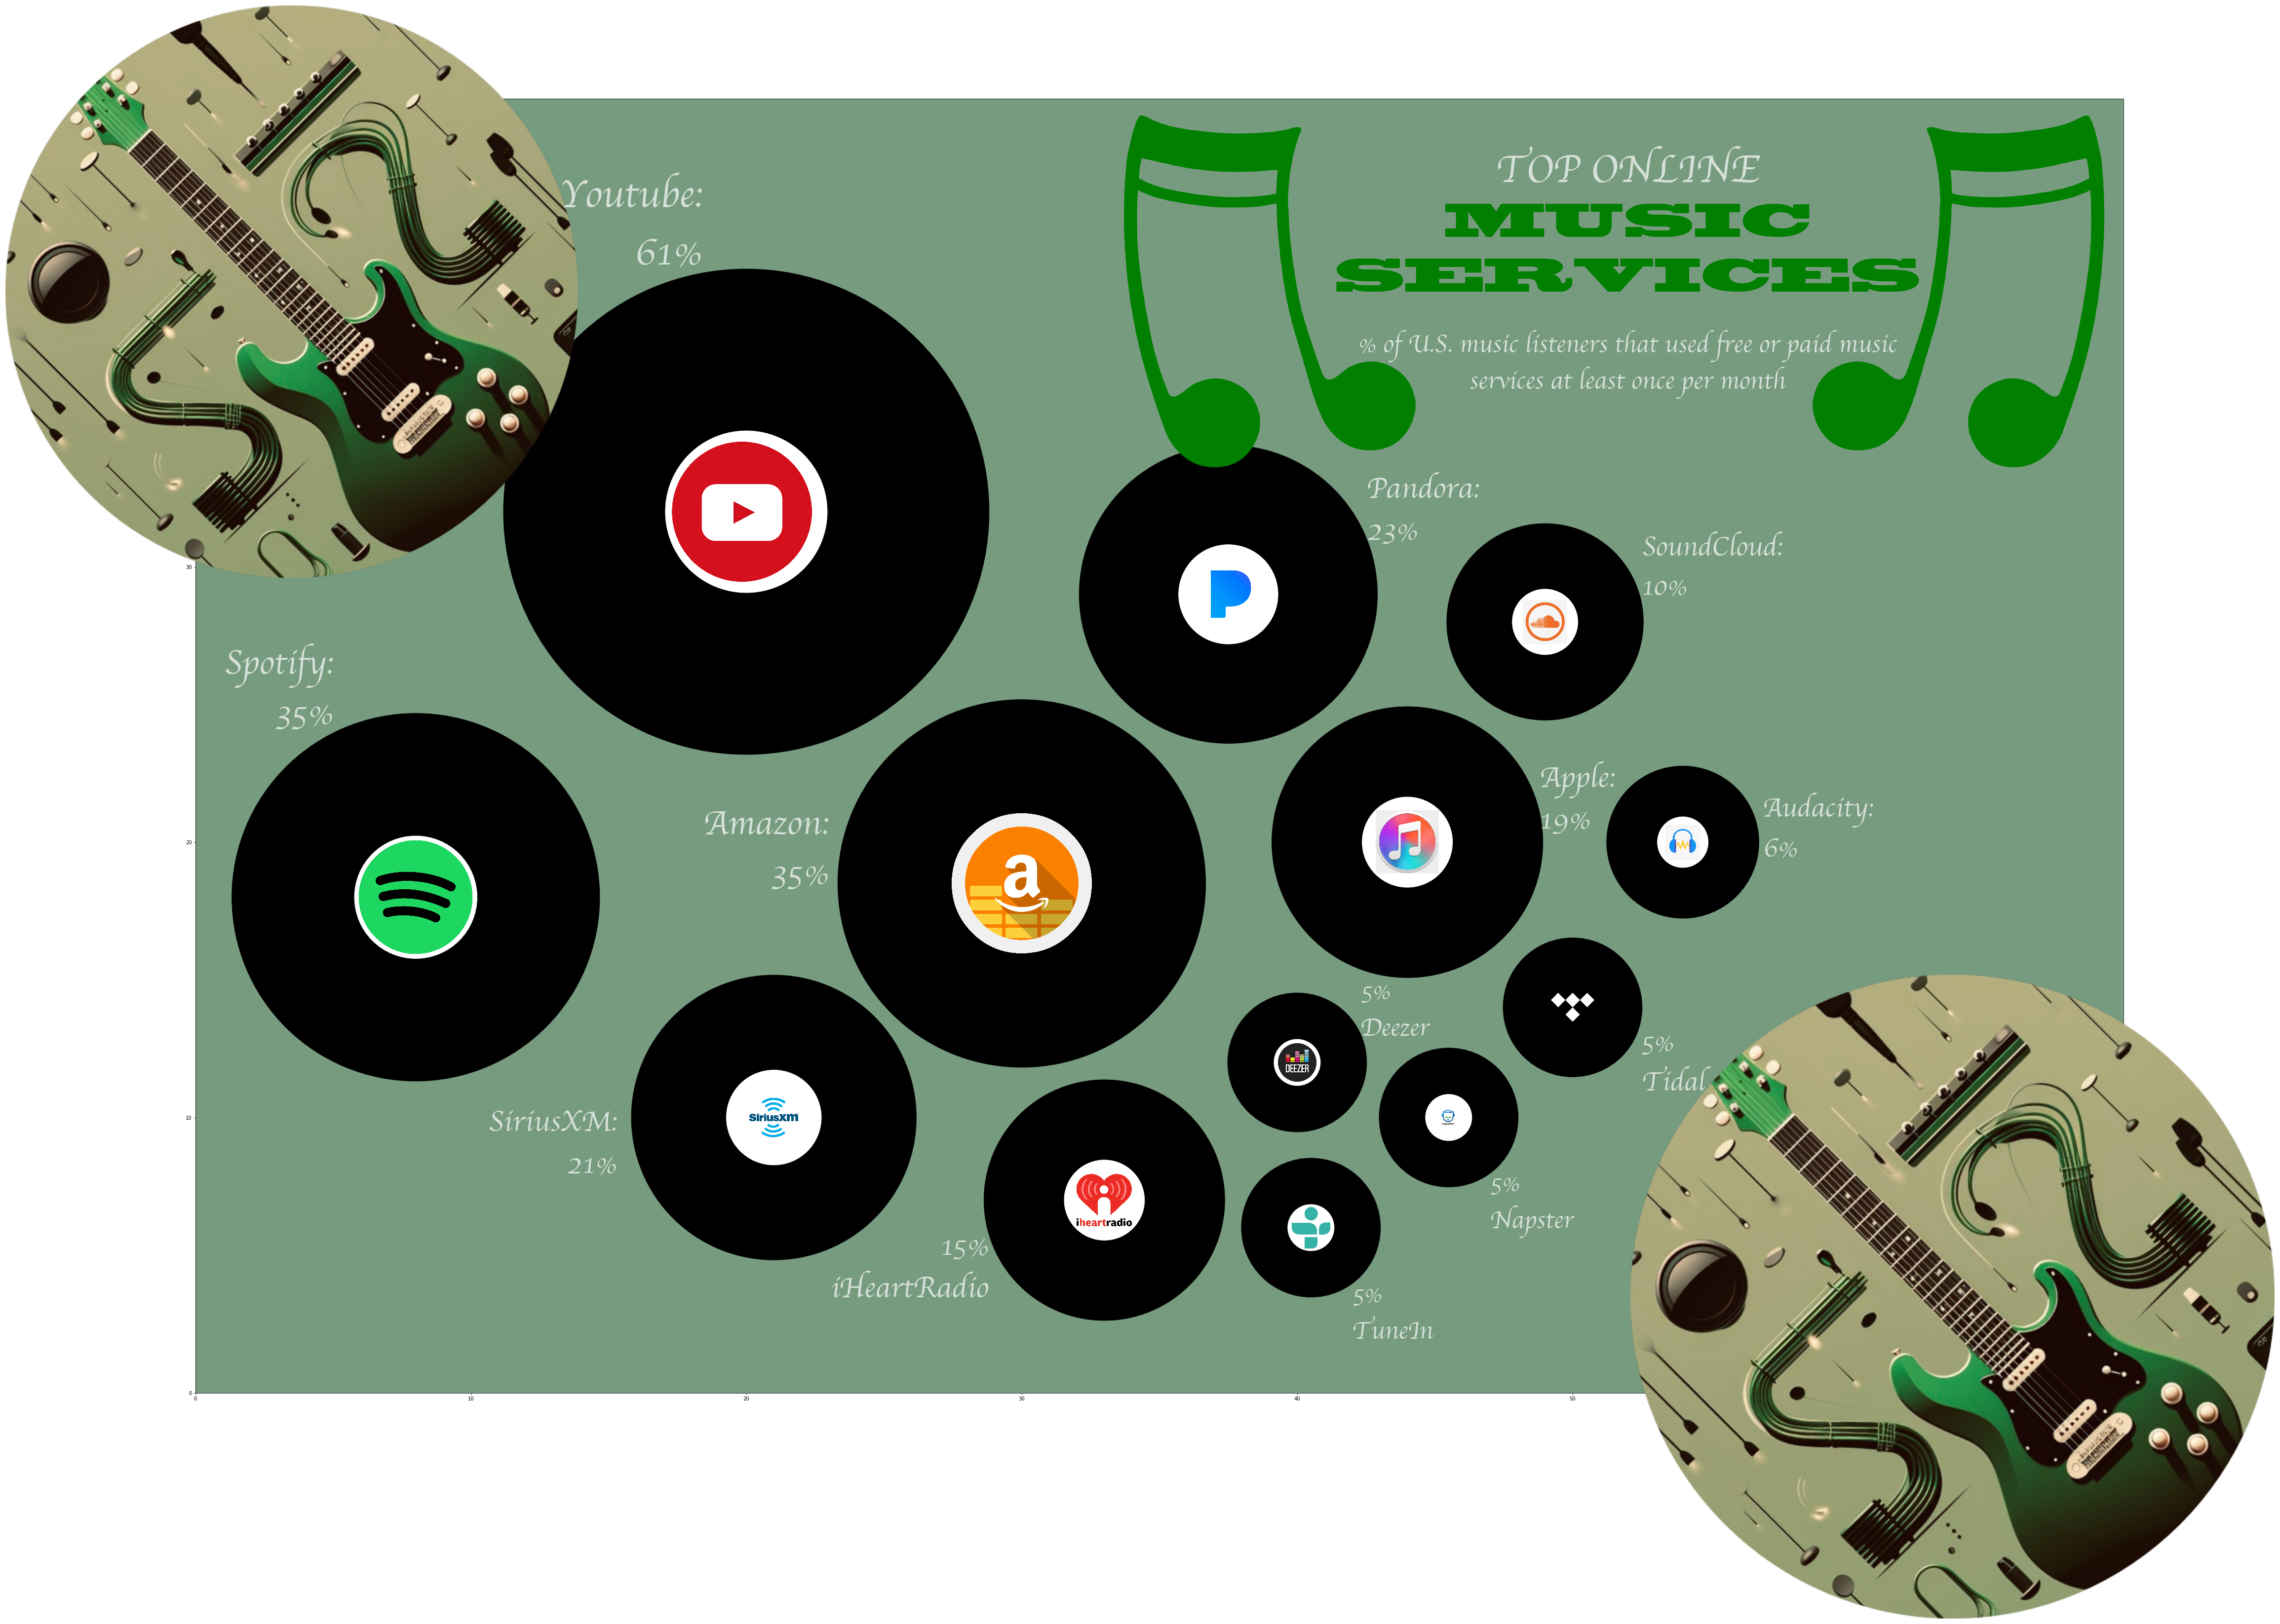

In [156]:
import matplotlib.pyplot as plt

# Radii and names
radii = df['r'].values
names = df['Music Service'].values

radii2 = df['sr'].values

# Center positions
positions = [(20.0, 32.0), (8.0, 18.0), (30.0, 18.5), (37.5, 29.0), 
             (21.0, 10.0), (44, 20.0), (33.0, 7.0), (49, 28.0), 
             (54.0, 20.0), (40.5, 6.0), (40.0, 12.0), (45.5, 10.0), 
             (50, 14.0)]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(70,50))

# Plot each circle
for i in range(len(positions)):
    circle = plt.Circle(positions[i], radii[i], alpha=1,color='black')
    ax.add_patch(circle)
    
    circle2 = plt.Circle(positions[i], radii2[i], alpha=1,color='white')
    ax.add_patch(circle2)
    
    # Add text (name of the music service) to the center of the circle
    plt.text(positions[i][0], positions[i][1], names[i], ha='center', va='center',color='white')

# Set the aspect of the plot to be equal, so circles aren't elliptical
ax.set_aspect('equal', 'box')
ax.set_xlim(0, 70)
ax.set_ylim(0, 47)

# Load the first image
img1 = mpimg.imread('/Users/chenjin/Library/CloudStorage/OneDrive-UniversityofPittsburgh/2023Fall/IV/mid/youtube.png')

# Create the OffsetImage for the first image
imagebox1 = OffsetImage(img1, zoom=0.12)  # Adjust zoom level as required

# Create an AnnotationBbox with our OffsetImage and desired position
ab1 = AnnotationBbox(imagebox1, (20.0, 32.0), frameon=False)

# Add it to the ax
ax.add_artist(ab1)

# Load the second image
img2 = mpimg.imread('/Users/chenjin/Library/CloudStorage/OneDrive-UniversityofPittsburgh/2023Fall/IV/mid/sp.webp')
imagebox2 = OffsetImage(img2, zoom=0.2)  # Adjust zoom level as required
ab2 = AnnotationBbox(imagebox2, (8.0, 18.0), frameon=False)
ax.add_artist(ab2)

# Load the third image
img3 = mpimg.imread('/Users/chenjin/Library/CloudStorage/OneDrive-UniversityofPittsburgh/2023Fall/IV/mid/ama.png')
imagebox3 = OffsetImage(img3, zoom=0.3)  # Adjust zoom level as required
ab3 = AnnotationBbox(imagebox3, (30.0, 18.5), frameon=False)
ax.add_artist(ab3)

# Load the third image
img4 = mpimg.imread('/Users/chenjin/Library/CloudStorage/OneDrive-UniversityofPittsburgh/2023Fall/IV/mid/pan.webp')
imagebox4 = OffsetImage(img4, zoom=0.15)  # Adjust zoom level as required
ab4 = AnnotationBbox(imagebox4, (37.5, 29.0), frameon=False)
ax.add_artist(ab4)

# Load the third image
img5 = mpimg.imread('/Users/chenjin/Library/CloudStorage/OneDrive-UniversityofPittsburgh/2023Fall/IV/mid/sir.jpeg')
imagebox5 = OffsetImage(img5, zoom=0.15)  # Adjust zoom level as required
ab5 = AnnotationBbox(imagebox5, (21.0, 10.0), frameon=False)
ax.add_artist(ab5)

# Load the third image
img6 = mpimg.imread('/Users/chenjin/Library/CloudStorage/OneDrive-UniversityofPittsburgh/2023Fall/IV/mid/apple.jpeg')
imagebox6 = OffsetImage(img6, zoom=0.16)  # Adjust zoom level as required
ab6 = AnnotationBbox(imagebox6, (44, 20.0), frameon=False)
ax.add_artist(ab6)


# Load the third image
img7 = mpimg.imread('/Users/chenjin/Library/CloudStorage/OneDrive-UniversityofPittsburgh/2023Fall/IV/mid/iHeartRadio.png')
imagebox7 = OffsetImage(img7, zoom=0.05)  # Adjust zoom level as required
ab7 = AnnotationBbox(imagebox7, (33.0, 7.0), frameon=False)
ax.add_artist(ab7)

# Load the third image
img8 = mpimg.imread('/Users/chenjin/Library/CloudStorage/OneDrive-UniversityofPittsburgh/2023Fall/IV/mid/sou.png')
imagebox8 = OffsetImage(img8, zoom=0.4)  # Adjust zoom level as required
ab8 = AnnotationBbox(imagebox8, (49, 28.0), frameon=False)
ax.add_artist(ab8)

# Load the third image
img9 = mpimg.imread('/Users/chenjin/Library/CloudStorage/OneDrive-UniversityofPittsburgh/2023Fall/IV/mid/aud.jpg')
imagebox9 = OffsetImage(img9, zoom=0.08)  # Adjust zoom level as required
ab9 = AnnotationBbox(imagebox9, (54.0, 20.0), frameon=False)
ax.add_artist(ab9)

# Load the third image
img10 = mpimg.imread('/Users/chenjin/Library/CloudStorage/OneDrive-UniversityofPittsburgh/2023Fall/IV/mid/tun.png')
imagebox10 = OffsetImage(img10, zoom=0.14)  # Adjust zoom level as required
ab10 = AnnotationBbox(imagebox10, (40.5, 6.0), frameon=False)
ax.add_artist(ab10)

# Load the third image
img11 = mpimg.imread('/Users/chenjin/Library/CloudStorage/OneDrive-UniversityofPittsburgh/2023Fall/IV/mid/dee.png')
imagebox11 = OffsetImage(img11, zoom=0.16)  # Adjust zoom level as required
ab11 = AnnotationBbox(imagebox11, (40.0, 12.0), frameon=False)
ax.add_artist(ab11)

# Load the third image
img12 = mpimg.imread('/Users/chenjin/Library/CloudStorage/OneDrive-UniversityofPittsburgh/2023Fall/IV/mid/na.png')
imagebox12  = OffsetImage(img12 , zoom=0.14)  # Adjust zoom level as required
ab12  = AnnotationBbox(imagebox12 , (45.5, 10.0), frameon=False)
ax.add_artist(ab12 )

# Load the third image
img13 = mpimg.imread('/Users/chenjin/Library/CloudStorage/OneDrive-UniversityofPittsburgh/2023Fall/IV/mid/tidal.png')
imagebox13  = OffsetImage(img13 , zoom=0.1)  # Adjust zoom level as required
ab13  = AnnotationBbox(imagebox13 , (50, 14.0), frameon=False)
ax.add_artist(ab13 )


#Load the third image
img14 = mpimg.imread('/Users/chenjin/Library/CloudStorage/OneDrive-UniversityofPittsburgh/2023Fall/IV/mid/mnew.png')
imagebox14 = OffsetImage(img14, zoom=1.6)
imagebox14.angle = -45  # Rotate by 45 degrees
ab14 = AnnotationBbox(imagebox14, (3.5, 40), frameon=False)
ax.add_artist(ab14)

#Load the third image
img15 = mpimg.imread('/Users/chenjin/Library/CloudStorage/OneDrive-UniversityofPittsburgh/2023Fall/IV/mid/mnew.png')
imagebox15 = OffsetImage(img15, zoom=1.8)
imagebox15.angle = -45  # Rotate by 45 degrees
ab15 = AnnotationBbox(imagebox15, (63.8, 3.5), frameon=False)
ax.add_artist(ab15)


#Load the 16 image
img16 = mpimg.imread('/Users/chenjin/Library/CloudStorage/OneDrive-UniversityofPittsburgh/2023Fall/IV/mid/note.png')
imagebox16 = OffsetImage(img16, zoom=1.2)
imagebox16.angle = 0  # Rotate by 45 degrees
ab16 = AnnotationBbox(imagebox16, (64, 40), frameon=False)
ax.add_artist(ab16)

#Load the 17 image

# Replace 'your_image.png' with the path to your local PNG file
image_path = '/Users/chenjin/Library/CloudStorage/OneDrive-UniversityofPittsburgh/2023Fall/IV/mid/note.png'
mirrored_image_path = 'mirrored_image.png'
# Open the image
original_image = Image.open(image_path)
# Create the mirrored image
mirrored_image = original_image.transpose(Image.FLIP_LEFT_RIGHT)

imagebox17 = OffsetImage(mirrored_image, zoom=1.2)
imagebox17.angle = 0  # Rotate by 45 degrees
ab17 = AnnotationBbox(imagebox17, (39, 40), frameon=False)
ax.add_artist(ab17)

ax.set_facecolor('#56825f')
#fig.set_facecolor('#56825f')
ax.patch.set_alpha(0.8)
fig.patch.set_alpha(0.8) 


# Adding text with different font sizes, font styles, and a sample art font style
ax.text(52, 44, "TOP ONLINE", ha='center', family='Apple Chancery', fontsize=80, fontstyle='italic',color='white',alpha=0.7)
ax.text(52, 42, "MUSIC", ha='center', fontsize=90, family = 'Blackoak Std',fontstyle='normal', weight='bold',color='#007F00')
ax.text(52, 40, "SERVICES", ha='center', fontsize=90, family = 'Blackoak Std',fontstyle='normal', weight='bold',color='#007F00')
ax.text(52, 36.5, "% of U.S. music listeners that used free or paid music\nservices at least once per month", family='Apple Chancery', ha='center', fontsize=50, fontstyle='normal',color='white',alpha=0.7)

# Adding text with name and percentage
ax.text(18.4, 41, "Youtube:\n61%", ha='right', fontsize=80, family = 'Apple Chancery',fontstyle='normal', weight='bold',color='white',alpha=0.7)
ax.text(5, 24.3, "Spotify:\n35%", ha='right', fontsize=70, family = 'Apple Chancery',fontstyle='normal', weight='bold',color='white',alpha=0.7)
ax.text(23, 18.5, "Amazon:\n35%", ha='right', fontsize=70, family = 'Apple Chancery',fontstyle='normal', weight='bold',color='white',alpha=0.7)
ax.text(42.5, 31, "Pandora:\n23%", ha='left', fontsize=60, family = 'Apple Chancery',fontstyle='normal', weight='bold',color='white',alpha=0.7)
ax.text(15.3, 8, "SiriusXM:\n21%", ha='right', fontsize=60, family = 'Apple Chancery',fontstyle='normal', weight='bold',color='white',alpha=0.7)
ax.text(48.8, 20.5, "Apple:\n19%", ha='left', fontsize=60, family = 'Apple Chancery',fontstyle='normal', weight='bold',color='white',alpha=0.7)
ax.text(28.8, 3.5, "15%\niHeartRadio", ha='right', fontsize=60, family = 'Apple Chancery',fontstyle='normal', weight='bold',color='white',alpha=0.7)


ax.text(52.5, 29, "SoundCloud:\n10%", ha='left', fontsize=55, family = 'Apple Chancery',fontstyle='normal', weight='bold',color='white',alpha=0.7)
ax.text(56.9, 19.5, "Audacity:\n6%", ha='left', fontsize=55, family = 'Apple Chancery',fontstyle='normal', weight='bold',color='white',alpha=0.7)



ax.text(42, 2, "5%\nTuneIn", ha='left', fontsize=50, family = 'Apple Chancery',fontstyle='normal', weight='bold',color='white',alpha=0.7)
ax.text(42.3, 13, "5%\nDeezer", ha='left', fontsize=50, family = 'Apple Chancery',fontstyle='normal', weight='bold',color='white',alpha=0.7)
ax.text(47, 6, "5%\nNapster", ha='left', fontsize=50, family = 'Apple Chancery',fontstyle='normal', weight='bold',color='white',alpha=0.7)
ax.text(52.5, 11, "5%\nTidal", ha='left', fontsize=55, family = 'Apple Chancery',fontstyle='normal', weight='bold',color='white',alpha=0.7)


# Show the plot
plt.show()
